Membuat class Word sebagai template setiap kata untuk setiap task pada chapter ini

In [53]:
import json
import pydot 
import pandas as pd
from IPython.display import Image, display
from itertools import combinations


class Word:
  def __init__(self, token_data):
    self.index = token_data.get('index')
    self.text = token_data.get('word')
    self.lemma = token_data.get('lemma', self.text)
    self.pos = token_data.get('pos')

    self.head = None
    self.dep = ''
    self.children = []
  
  def __repr__(self):
    return f"Word(text={self.text}, lemma={self.lemma}, pos={self.pos})"

In [54]:
filename = './ai.en.txt.json'
all_sentences = []

In [55]:
try:
  with open(filename, 'r', encoding='utf-8') as f:
    data = json.load(f)
    for sentence_data in data['sentences']:
        
        current_sentence_words = [Word(token) for token in sentence_data['tokens']]
        
        
        dependencies = sentence_data['basicDependencies']
        for dep_info in dependencies:
            gov_idx = dep_info['governor'] - 1
            dep_idx = dep_info['dependent'] - 1
            
            dependent_word = current_sentence_words[dep_idx]
            dependent_word.dep = dep_info['dep']

            if gov_idx >= 0:
                governor_word = current_sentence_words[gov_idx]
                dependent_word.head = governor_word
                governor_word.children.append(dependent_word)
        
        all_sentences.append(current_sentence_words)

except FileNotFoundError:
  print(f"File '{filename}' tidak ditemukan.")
  all_sentences = []

# 40. Read the parse result (words) 
Design a class Word that represents a word. This class has three member variables, text (word surface), lemma (lemma), and pos (part-of-speech). Represent a sentence as an array of instances of Word class. Implement a program to load the parse result, and store the text as an array of sentences. Show the object of the first sentence of the body of the article.

In [56]:
if all_sentences:
    first_sentence_objects = all_sentences[0]
    data_for_df = [
        {'No.': i+1, 'Text': word.text, 'Lemma': word.lemma, 'POS': word.pos} 
        for i, word in enumerate(first_sentence_objects)
    ]
    df_40 = pd.DataFrame(data_for_df)
    display(df_40)
else:
    print("Tidak ada data kalimat untuk ditampilkan.")

,No.,Text,Lemma,POS
0,1,In,in,IN
1,2,computer,computer,NN
2,3,science,science,NN
3,4,",",",",","
4,5,artificial,artificial,JJ
5,6,intelligence,intelligence,NN
6,7,-LRB-,-lrb-,-LRB-
7,8,AI,ai,NN
8,9,-RRB-,-rrb-,-RRB-
9,10,",",",",","


# 41. Read the parse result (dependency)
In addition to problem 40, add three member variables head (a reference to the object of its syntactic governor), dep (dependency type to its governor), and children (a list of references to the syntactic dependents in the parse tree) to the class Word. Show the pairs of governors (parents) and their dependents (children) of the first sentence of the body of the article. Use the class Word in the rest of the problems in this chapter.

In [57]:
if all_sentences:
    first_sentence_words = all_sentences[0]
    
    dependency_list = []
    for word in first_sentence_words:
        if word.children:
            for child in word.children:
                dependency_list.append({
                    'Governor (Induk)': f"{word.text} ({word.pos})",
                    'Relation (Hubungan)': child.dep,
                    'Dependent (Anak)': f"{child.text} ({child.pos})"
                })
    
    df_41 = pd.DataFrame(dependency_list)
    display(df_41)
else:
    print("Tidak ada data kalimat untuk ditampilkan.")

,Governor (Induk),Relation (Hubungan),Dependent (Anak)
0,science (NN),case,In (IN)
1,science (NN),compound,computer (NN)
2,intelligence (NN),amod,artificial (JJ)
3,intelligence (NN),appos,AI (NN)
4,intelligence (NN),punct,", (,)"
5,AI (NN),punct,-LRB- (-LRB-)
6,AI (NN),punct,-RRB- (-RRB-)
7,called (VBN),nmod,science (NN)
8,called (VBN),punct,", (,)"
9,called (VBN),nsubj,intelligence (NN)


# 42. Show root words
For each sentence, extract the root word (whose head is ROOT).

In [58]:
if all_sentences:
  root_word_data = []
  for i, sentence in enumerate(all_sentences):
    for word in sentence:
      if word.dep == 'ROOT':
        root_word_data.append({'No. Kalimat': i + 1, 'Root Word': word.text, 'POS': word.pos})
        break 
  
  df_42 = pd.DataFrame(root_word_data)
  display(df_42.head(10))
else:
  print("Tidak ada data kalimat untuk ditampilkan.")

,No. Kalimat,Root Word,POS
0,1,called,VBN
1,2,define,VBP
2,3,used,VBN
3,4,removed,VBN
4,5,says,VBZ
5,6,excluded,VBN
6,7,classified,VBN
7,8,founded,VBN
8,9,divided,VBN
9,10,based,VBN


# 43. Show verb governors and noun dependents 
Show all pairs of verb governors (parents) and their noun dependents (children) from all sentences in the text.

In [59]:
if all_sentences:
  verb_noun_pairs = []
  for sentence in all_sentences:
    for governor in sentence:
      if governor.pos.startswith('VB'):
        for dependent in governor.children:
          if dependent.pos.startswith('NN'):
            verb_noun_pairs.append({
                'Verb (Governor)': governor.text,
                'Relation': dependent.dep,
                'Noun (Dependent)': dependent.text
            })
            
  df_43 = pd.DataFrame(verb_noun_pairs)
  display(df_43.head(10))

else:
  print("Tidak ada data kalimat untuk ditampilkan.")

,Verb (Governor),Relation,Noun (Dependent)
0,called,nmod,science
1,called,nsubj,intelligence
2,called,xcomp,intelligence
3,is,nsubj,intelligence
4,demonstrated,nmod,machines
5,displayed,nmod,humans
6,define,nsubj,textbooks
7,define,dobj,field
8,define,nmod,study
9,perceives,dobj,environment


# 44. Visualize dependency trees 
Visualize a dependency tree of a sentence as a directed graph. Consider converting a dependency tree into DOT language and use Graphviz for drawing a directed graph. In addition, you can use pydot for drawing a dependency tree.

In [60]:
def create_dependency_graph(sentence):
    """Menerima sebuah kalimat (list of Word) dan mengembalikan objek grafik pydot."""
    graph = pydot.Dot(graph_type="digraph")
    nodes = {}
    for i, word in enumerate(sentence):
        node = pydot.Node(str(i), label=f"{word.text}\\n({word.pos})")
        nodes[i] = node
        graph.add_node(node)

    root_node = pydot.Node("ROOT_NODE", label="ROOT", shape="box")
    graph.add_node(root_node)

    for i, word in enumerate(sentence):
        if word.head:
            head_index = sentence.index(word.head)
            edge = pydot.Edge(nodes[head_index], nodes[i], label=word.dep)
            graph.add_edge(edge)
        elif word.dep == 'ROOT':
            edge = pydot.Edge(root_node, nodes[i], label=word.dep)
            graph.add_edge(edge)
    return graph



--- Dependency tree untuk Kalimat ke-1 ---


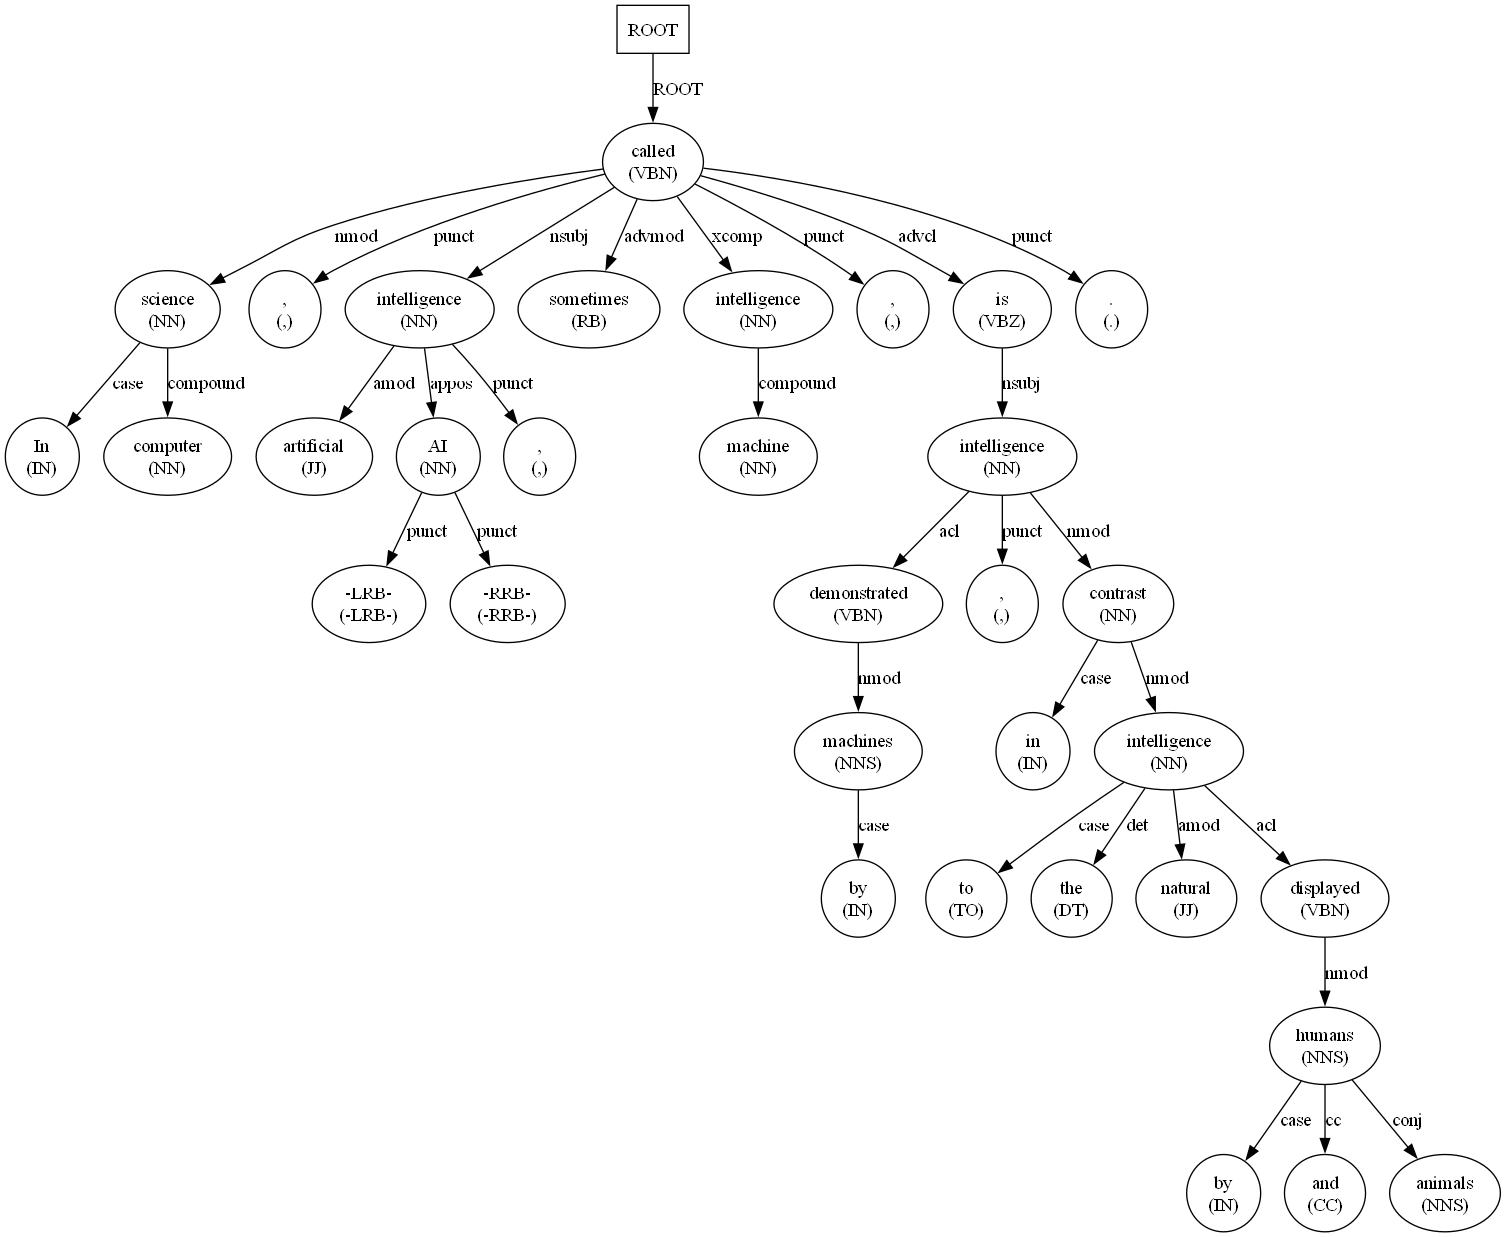


--- Dependency tree untuk Kalimat ke-6 ---


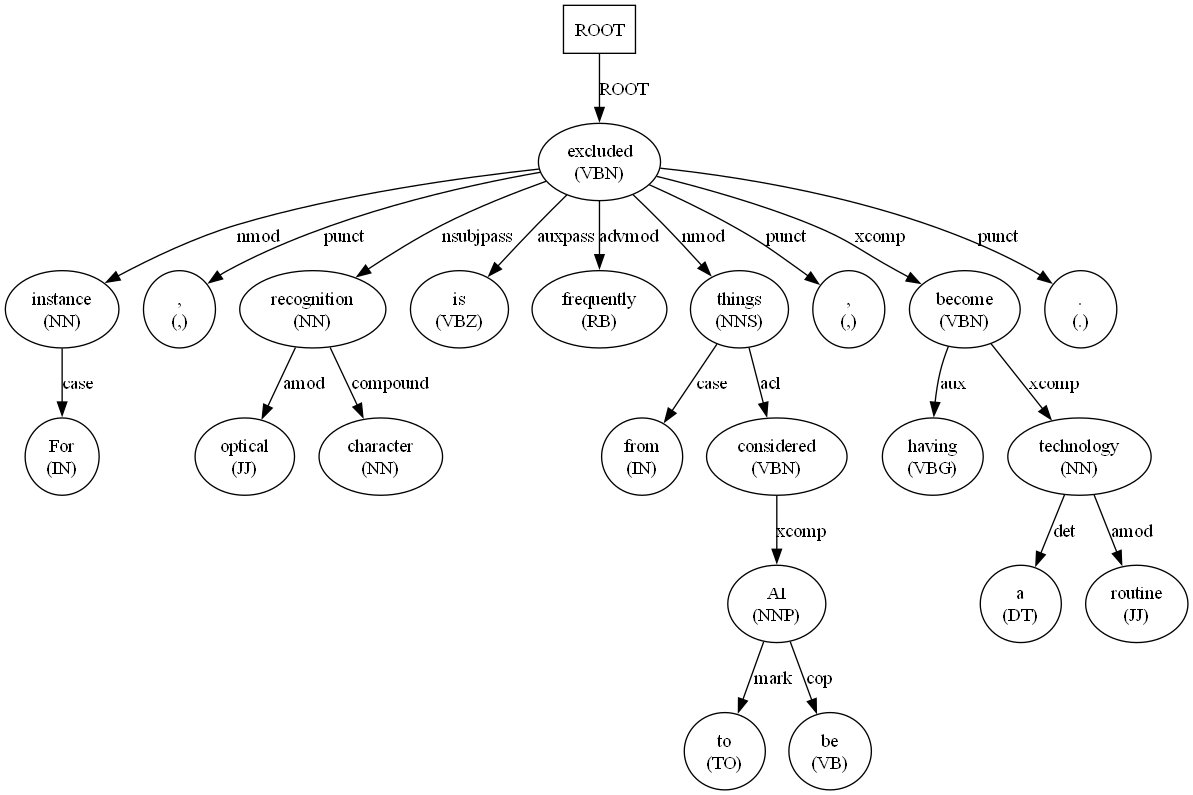


--- Dependency tree untuk Kalimat ke-11 ---


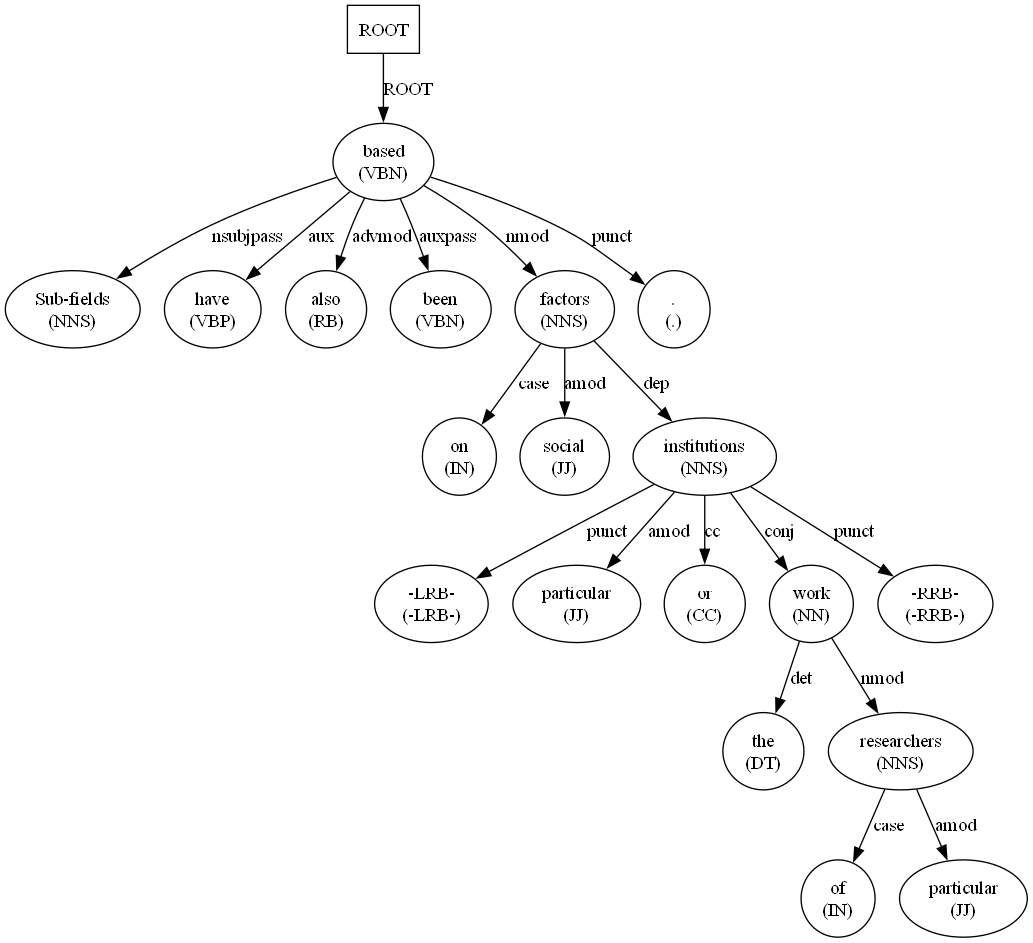

In [61]:
if all_sentences:
  try:
    sentences_to_visualize_indices = [0, 5, 10] 

    for index in sentences_to_visualize_indices:
        if index < len(all_sentences):
            sentence = all_sentences[index]
            graph = create_dependency_graph(sentence)
            png_data = graph.create_png()
            print(f"\n--- Dependency tree untuk Kalimat ke-{index + 1} ---")
            display(Image(png_data))

  except Exception as e:
    print(f"Terjadi error saat membuat atau menampilkan grafik: {e}")
    print("Pastikan Graphviz dan pydot sudah terinstal dengan benar.")
else:
  print("Tidak ada data kalimat untuk ditampilkan.")

# 45. Triple with subject, verb, and direct object 
We are interested in extracting facts from the text. In this chapter, we represent a fact as a tuple of (subject, predicate, object). Extract tuples from dependency trees where:

subject is a nominal subject of a verb in the past tense
predicate is the verb in the past tense
object is a direct object of the verb
Consider an example sentence, “Frank Rosenblatt invented the perceptron”. We want to extract a tuple, (Rosenblatt, invented, perceptron), from the sentence. In this problem, we only consider a subject and object as a single word.


In order to extract a tuple from a dependency tree, it may be a good idea to design an extraction rule on the dependency tree.

In [62]:
if all_sentences:
  facts = []
  for sentence in all_sentences:
    for predicate in sentence:
      if predicate.pos == 'VBD':
        subject = None
        obj = None
        for child in predicate.children:
          if child.dep == 'nsubj':
            subject = child.text
          elif child.dep == 'dobj':
            obj = child.text
        
        if subject and obj:
          facts.append({
              'Subject': subject,
              'Predicate (Verb)': predicate.text,
              'Object': obj
          })

  df_45 = pd.DataFrame(facts)
  display(df_45.head(10))

else:
  print("Tidak ada data kalimat untuk ditampilkan.")

,Subject,Predicate (Verb),Object
0,characters,raised,many
1,this,led,researchers
2,They,produced,programs
3,governments,cut,research
4,project,inspired,U.S
5,development,enabled,development
6,match,defeated,champions
7,computers,enabled,advances
8,AlphaGo,won,games
9,AlphaGo,won,match


# 46. Expanding subjects and objects
Improve the program of Problem 45 to remove the restriction that subjects and objects are single words but can also be phrases. For example, we want to extract (Frank Rosenblatt, invented, perceptron) from the sentence, “Frank Rosenblatt invented the perceptron”.

In [63]:
def get_phrase_text(head_word):
    """
    Mengambil sebuah kata utama, menelusuri semua turunannya (anak, cucu, dst.),
    mengurutkannya, lalu menggabungkannya menjadi satu frasa.
    """
    queue = list(head_word.children)
    phrase_words = [head_word]
    
    while queue:
        word = queue.pop(0)
        phrase_words.append(word)
        if word.children:
            queue.extend(word.children)       
    phrase_words.sort(key=lambda x: x.index)
    
    return " ".join([w.text for w in phrase_words])

In [64]:
if all_sentences:
  facts_with_phrases = []
  for sentence in all_sentences:
    for predicate in sentence:
      if predicate.pos == 'VBD':
        subject_head = None
        object_head = None
        for child in predicate.children:
          if child.dep == 'nsubj':
            subject_head = child
          elif child.dep == 'dobj':
            object_head = child
        
        if subject_head and object_head:
          subject_phrase = get_phrase_text(subject_head)
          object_phrase = get_phrase_text(object_head)
          
          facts_with_phrases.append({
              'Subject Phrase': subject_phrase,
              'Predicate (Verb)': predicate.text,
              'Object Phrase': object_phrase
          })

  df_46 = pd.DataFrame(facts_with_phrases)
  display(df_46.head(10))
else:
  print("Tidak ada data kalimat untuk ditampilkan.")

,Subject Phrase,Predicate (Verb),Object Phrase
0,These characters and their fates,raised,many of the same issues now discussed in the e...
1,this,led,researchers
2,They and their students,produced,programs that the press described as `` astoni...
3,both the U.S. and British governments,cut,exploratory research
4,Japan 's fifth generation computer project,inspired,the U.S and British governments
5,The development of metal -- oxide -- semicondu...,enabled,the development of practical artificial neural...
6,"a `` Jeopardy! '' quiz show exhibition match ,...",defeated,"the two greatest `` Jeopardy! '' champions , B..."
7,"Faster computers , algorithmic improvements , ...",enabled,advances in machine learning and perception
8,AlphaGo,won,out of 5 games of Go
9,AlphaGo,won,"a three-game match with Ke Jie , who at the ti..."


# 47. Triple from the passive sentence 
Extract facts from sentences in the passive voice. Consider an example sentence, “Artificial intelligence was founded as an academic discipline in 1955”. We want to extract two tuples from the sentence,

- (Artificial intelligence, founded-as, academic discipline)
- (Artificial intelligence, founded-in, 1955)

In [65]:
if all_sentences:
  passive_facts = []
  for sentence in all_sentences:
    for predicate in sentence:
      if predicate.pos == 'VBN':
        subject_head = None
        for child in predicate.children:
          if child.dep == 'nsubjpass':
            subject_head = child
            break

        if subject_head:
          for child in predicate.children:
            preposition = None
            object_head = None
            
            if child.dep == 'nmod:agent':
              preposition = 'by' # Hubungan 'agent' secara implisit berarti 'by'
              object_head = child
            
            elif child.dep == 'nmod':
              for grandchild in child.children:
                if grandchild.dep == 'case':
                  preposition = grandchild.text.lower()
                  object_head = child
                  break # Cukup satu preposisi per nmod
            
            if preposition and object_head:
              fact_predicate = f"{predicate.lemma}-{preposition}"
              subject_phrase = get_phrase_text(subject_head)
              object_phrase = get_phrase_text(object_head)
              
              passive_facts.append({
                  'Subject Phrase': subject_phrase,
                  'Predicate': fact_predicate,
                  'Object Phrase': object_phrase
              })

  df_47 = pd.DataFrame(passive_facts)
  df_47 = df_47.drop_duplicates().reset_index(drop=True)
  display(df_47.head(10))
else:
  print("Tidak ada data kalimat untuk ditampilkan.")

,Subject Phrase,Predicate,Object Phrase
0,tasks considered to require `` intelligence '',remove-from,"from the definition of AI , a phenomenon known..."
1,optical character recognition,exclude-for,For instance
2,optical character recognition,exclude-from,from things considered to be AI
3,Artificial intelligence,found-as,as an academic discipline
4,Artificial intelligence,found-in,in 1955
5,AI research,divide-for,For most of its history
6,AI research,divide-into,into sub-fields that often fail to communicate...
7,These sub-fields,base-on,"on technical considerations , such as particul..."
8,Sub-fields,base-on,on social factors -LRB- particular institution...
9,Many tools,use-in,in AI


# 48. Extract paths from the root to nouns 
For every noun in a dependency tree, extract a path from the root to the noun. Here, each path must satisfy the following specifications.

Nodes in a path are words in surface form
Nodes are connected with “ -> “ from the root to the leaf node
We don’t have to include dependency types (e.g., nsubj, dobj) when representing a dependency path.

In [66]:
def find_path_to_root(start_word):
    """Menerima sebuah kata, lalu melacak jalurnya ke atas hingga ke root."""
    path = []
    current_word = start_word
    while current_word:
        path.append(current_word.text)
        current_word = current_word.head
    
    return " -> ".join(reversed(path))

In [67]:
if all_sentences:
  paths_to_nouns = []
  for sentence in all_sentences:
    for word in sentence:
      if word.pos.startswith('NN'):
        path = find_path_to_root(word)
        paths_to_nouns.append(path)

  print("Menampilkan 10 contoh path pertama yang ditemukan:\n")
  for path in paths_to_nouns[:10]:
      print(path)

else:
  print("Tidak ada data kalimat untuk ditampilkan.")

Menampilkan 10 contoh path pertama yang ditemukan:

called -> science -> computer
called -> science
called -> intelligence
called -> intelligence -> AI
called -> intelligence -> machine
called -> intelligence
called -> is -> intelligence
called -> is -> intelligence -> demonstrated -> machines
called -> is -> intelligence -> contrast
called -> is -> intelligence -> contrast -> intelligence


# 49. Extract the shortest path between two nouns
Extract the shortest path for every pair of two nouns. Supposing that two nouns appear at the \(i\)-th and \(j\)-th positions (in words) in a sentence \((i < j)\), the shortest path must satisfy the following specifications.

- Nodes in a path are words in surface form
- Nodes corresponding to the \(i\)-th and \(j\)-th words are replaced with X and Y, respectively.
- Nodes are connected with either “ -> “ or “ <- “ from X to Y to represent a direction of a dependency.

We can consider two types of dependency paths.

- When the \(j\)-th word appears on the path from the \(i\)-th word to the root: the path from the \(i\)-th word to the \(j\)-th word
- When the \(i\)-th and \(j\)-th words have the common ancestor (the \(k\)-th word) in the dependency tree: the path from the \(i\)-th word to the \(k\)-th word connected with “ <- “, followed by the path from the \(k\)-th word to the \(j\)-th word connected with “ -> “.

In [68]:
def find_path_to_root_objects(start_word):
    """Menerima sebuah objek Word, mengembalikan list OBJEK Word dari kata tsb ke akar."""
    path = []
    current_word = start_word
    while current_word:
        path.append(current_word)
        current_word = current_word.head
    return path

In [69]:
if all_sentences:
    shortest_paths = []
    for sentence in all_sentences:
        nouns = [word for word in sentence if word.pos.startswith('NN')]
        for noun1, noun2 in combinations(nouns, 2):
            path1 = find_path_to_root_objects(noun1)
            path2 = find_path_to_root_objects(noun2)
            path1_text = [w.text for w in path1]
            
            if noun1.text in [w.text for w in path2]:
                idx_in_path2 = [w.text for w in path2].index(noun1.text)
                sub_path = [w.text for w in path2[:idx_in_path2 + 1]]
                sub_path.reverse()
                sub_path[0] = 'X'
                sub_path[-1] = 'Y'
                shortest_paths.append(" -> ".join(sub_path))
            
            else:
                lca_k = None  
                path1_to_lca = []
                path2_to_lca = []

                for i, p1_word in enumerate(path1):
                    for j, p2_word in enumerate(path2):
                        if p1_word == p2_word:
                            lca_k = p1_word
                            path1_to_lca = path1[:i]
                            path2_to_lca = path2[:j]
                            break
                    if lca_k:
                        break
              
                if lca_k:
                    path_up = " <- ".join(['X'] + [w.text for w in path1_to_lca])
                    path_down_list = [w.text for w in path2_to_lca]
                    path_down_list.reverse()
                    path_down = " -> ".join([lca_k.text] + path_down_list + ['Y'])
                    shortest_paths.append(f"{path_up} <- {path_down}")

    print("Menampilkan 10 contoh path pertama yang ditemukan:\n")
    for path in shortest_paths[:10]:
        print(path)
else:
    print("Tidak ada data kalimat untuk ditampilkan.")

Menampilkan 10 contoh path pertama yang ditemukan:

X <- computer <- science -> Y
X <- computer <- science <- called -> intelligence -> Y
X <- computer <- science <- called -> intelligence -> AI -> Y
X <- computer <- science <- called -> intelligence -> machine -> Y
X <- computer <- science <- called -> intelligence -> Y
X <- computer <- science <- called -> is -> intelligence -> Y
X <- computer <- science <- called -> is -> intelligence -> demonstrated -> machines -> Y
X <- computer <- science <- called -> is -> intelligence -> contrast -> Y
X <- computer <- science <- called -> is -> intelligence -> contrast -> intelligence -> Y
X <- computer <- science <- called -> is -> intelligence -> contrast -> intelligence -> displayed -> humans -> Y
